## Introduction

This Notebook was designed to provide control over- and visualise different numerical integration schemes.

Namely: 
    - Fixed Timestep methods:
        - Euler, Verlet, and Runge-Kutta 4
    - Adaptive method:
        - Runge-Kutta Dormand Prince 5(4)

The actual work is done behind-the-scenes by the Python 3 scripts that this notebook calls (using the %run linemagic). These files must be present in the folder from where the notebook is run.
Visualisation is done using Bokeh and matplotlib.

Usage:
    1. Run the first cell calling jupyter_init.py. Set the parameters, then
    2. Run the cell %run -i -t comp.py. This is the actual numerical integration. -i and -t means that the program uses the namespace of the notebook (to know what the input was in the init script), and that the run is timed using the built-in timeing function.
    3... The rest is pretty straightforward. There are short explanations before every runnable cell.

## Setup

In [1]:
%run ./src/jupyter_init.py

Please set the required parameters:


interactive(children=(ToggleButtons(description='1.) Integrator:', index=4, layout=Layout(flex_flow='column'), options=('Euler', 'Verlet', 'RK4', 'RKDP', 'All'), tooltips=['A simple forward Euler integrator', 'Velocity Verlet, a symplectic integrator', 'Fixed-timestep Runge-Kutta 4', 'Adaptive Runge-Kutta Dormand-Prince integrator', 'Run all integrators successively'], value='All'), Output()), _dom_classes=('widget-interact',))

interactive(children=(BoundedIntText(value=36524, description='2.) Total integration time [days]:', max=1000000, min=10, style=DescriptionStyle(description_width='initial')), Output()), _dom_classes=('widget-interact',))

interactive(children=(IntRangeSlider(value=(8, 10), continuous_update=False, description='3.) TimeStep range:', max=20, min=1, style=SliderStyle(description_width='initial')), Output()), _dom_classes=('widget-interact',))

interactive(children=(IntRangeSlider(value=(5, 7), continuous_update=False, description='4.) RKDP tolerance: 1.0E-', max=10, min=4, style=SliderStyle(description_width='initial')), Output()), _dom_classes=('widget-interact',))

interactive(children=(Checkbox(value=False, description='Include inner planets'), Output()), _dom_classes=('widget-interact',))

## Integration

In [3]:
%run -i -t ./src/comp.py

Do you want to clear library of previous logs? [y/n]: n
Leaving previous logs intact.

Number of objects: 6 
Total time [days]: 36524 
TimeStep range: 18 - 20 
Tolerance range: 1.0E-5 - 1.0E-6 

Euler integration...
18 days timestep:	1.1171 seconds.

19 days timestep:	1.0567 seconds.

20 days timestep:	1.0240 seconds.

Verlet integration...
18 days timestep:	1.2351 seconds.

19 days timestep:	1.1658 seconds.

20 days timestep:	1.1096 seconds.

RK4 integration...
18 days timestep:	5.2142 seconds.

19 days timestep:	4.9269 seconds.

20 days timestep:	4.6795 seconds.

Runge-Kutta Dormand-Prince integration...
1e-05 tolerance:	2.4058 seconds.

1e-06 tolerance:	3.7275 seconds.

Whole program took 27.74 seconds.

IPython CPU timings (estimated):
  User   :      28.68 s.
  System :       0.00 s.
Wall time:      28.68 s.


## Results
#### Orbits for 67P/Churyumov–Gerasimenko
All runs displayed on a figure, then individual results are shown in separate tabs for each method. JPL Horizons data is displayed as a solid line for 67P/C-G, and as a dashed line for Jupiter. The circles only show the results for 67P/C-G.

Click on the names in the Legend to show/hide gliphs.

In [5]:
%run -i ./src/bokehorbits.py

Loading BokehJS ...

#### CPU Time comparisons

In [15]:
%run ./src/bokehCPU.py

Loading BokehJS ...

### Runge-Kutta Dormand-Prince
A closer look at the adaptive method.

#### Errors and time steps
Visualising the difference between the fifth and fourth order terms. Also showing the corresponding timestep size.

During its operation, the RKDP method looks at the relative error of every variable in the differential equations at every attempted step: if the scaled error is above 1, the step is re-tried. The following plot shows the errors of every variable, so that the worst-offenders can be observed.

Note the spike in errors, and the corresponding drop in step-size near the close-approach around the ~21500 day mark.

In [17]:
%run ./src/bokehRKDP.py

Loading BokehJS ...

#### Animation
##### (Useful without the inner planets)

An animation showing the movement of Jupiter(red) and 67P/C-G(blue) around the Sun(yellow), calculated with the medium tolerance RKDP method.

Two smaller dots show the location at previous steps, allowing visual observation of the change in StepSize.

Note the close-approach around the ~21500 day mark, and how it affects the StepSize.

<IPython.core.display.Javascript object>


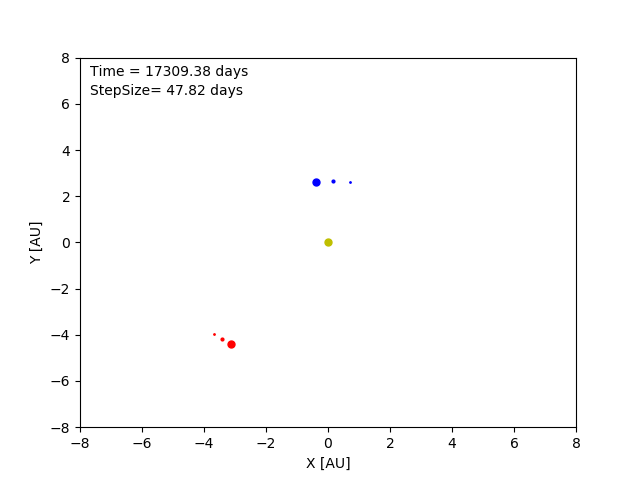

In [13]:
%matplotlib notebook
%run -i ./src/visual.py

anim = animation.FuncAnimation(fig1, animate, frames = framz, interval = 100, init_func = init, blit= True)
fig1.show()
